No normalization for SPS. Feature removed!
No normalization for AvgIpc. Feature removed!


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


C:\Users\Malli\anaconda3\envs\baceenv\lib\site-packages\torch_geometric\typing.py:86: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: [WinError 127] The specified procedure could not be found
  warnings.warn(f"An issue occurred while importing 'torch-scatter'. "
Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'dgl'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (C:\Users\Malli\anaconda3\envs\baceenv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


Loading QM7 dataset...
Task: u0_atom
Train set size: 5470
Valid set size: 684
Test set size: 684
Number of SMILES in train set: 5470
Example SMILES: [H]OC([H])([H])C(=C([H])[H])C([H])([H])C([H])=C([H])[H]

Calculating molecular descriptors...
Successfully calculated descriptors for 5470 training compounds
Successfully calculated descriptors for 684 validation compounds

Final train set shape: (5470, 11)
Final validation set shape: (684, 11)
Feature columns: ['Molecular Weight', 'LogP', 'Number of H-Bond Donors', 'Number of H-Bond Acceptors', 'Number of Rotatable Bonds', 'Number of Rings', 'Polar Surface Area', 'Number of Aromatic Rings', 'Number of Atoms', 'Number of Heavy Atoms', 'random']

Feature correlations with target (atomization energy):
                       feature  correlation
9        Number of Heavy Atoms    -0.400775
8              Number of Atoms    -0.396659
0             Molecular Weight    -0.300958
4    Number of Rotatable Bonds    -0.149161
1                       

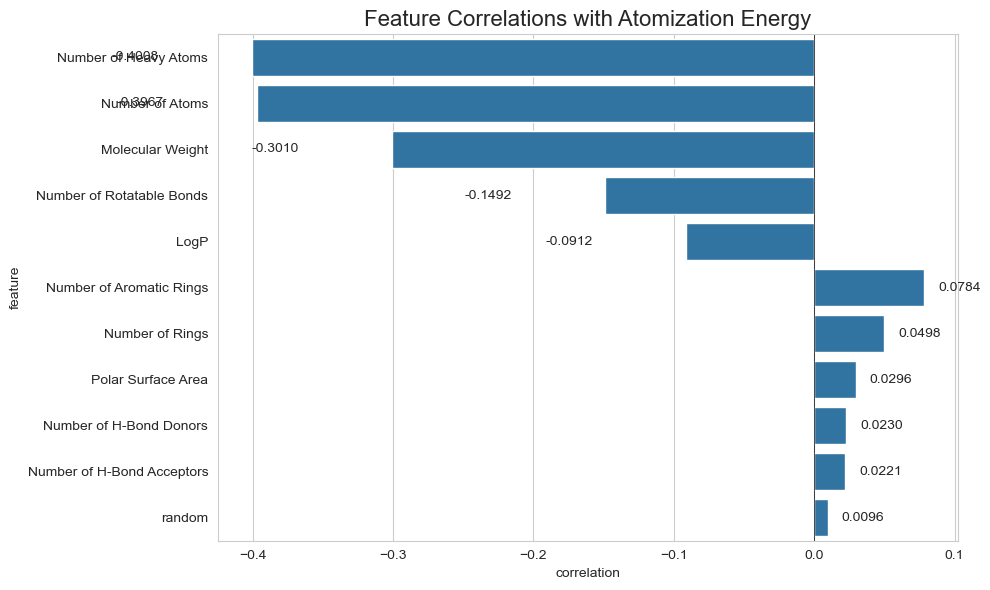


Training Random Forest model...
R^2 Training Score: 0.8885
OOB Score: 0.1925
R^2 Validation Score: 0.1362

Calculating default Scikit-learn feature importances...
Features ranked by default importance:
                       feature  feature_importance
0                       random            0.278279
1                         LogP            0.181496
2             Molecular Weight            0.141205
3           Polar Surface Area            0.118488
4              Number of Atoms            0.099272
5    Number of Rotatable Bonds            0.054955
6        Number of Heavy Atoms            0.050985
7              Number of Rings            0.036474
8      Number of H-Bond Donors            0.019591
9   Number of H-Bond Acceptors            0.014290
10    Number of Aromatic Rings            0.004965


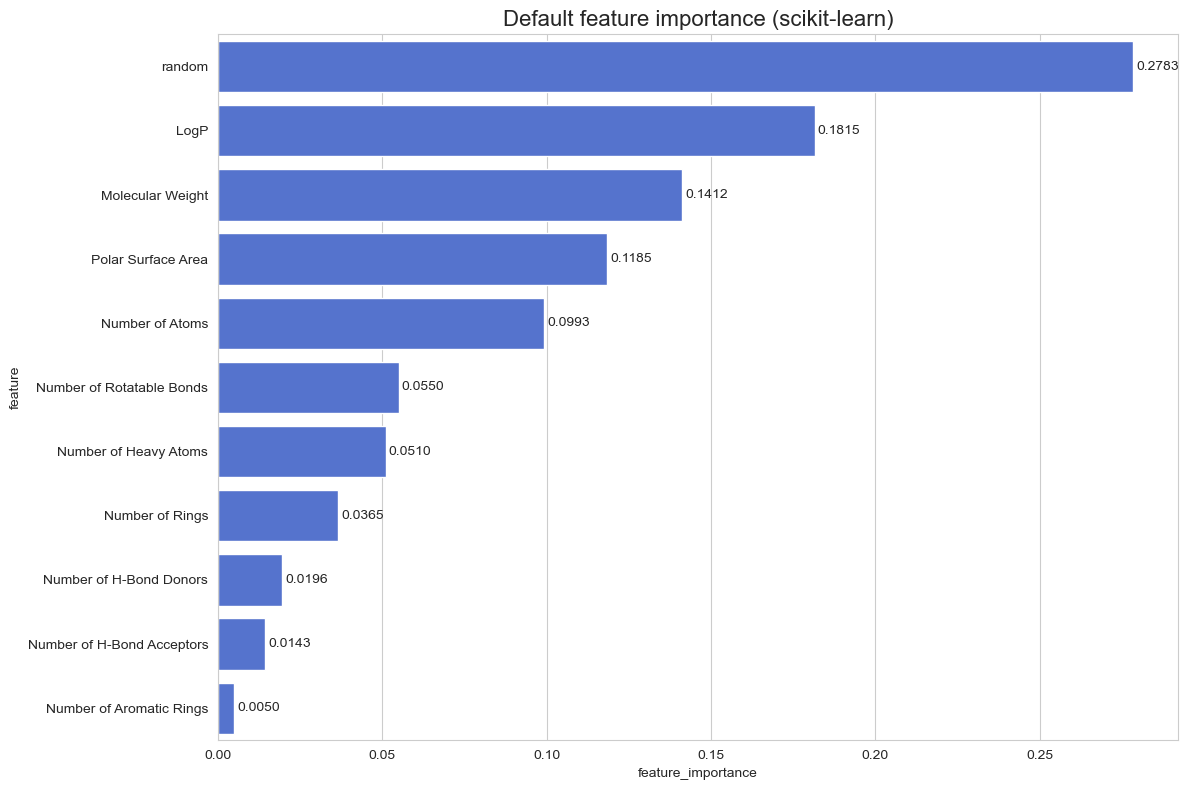


Random feature in default importance:
Rank: 1 out of 11 features
Top percentile: 90.91%
Importance value: 0.278279

Calculating permutation feature importance...
Features ranked by permutation importance:
                       feature  feature_importance
0           Polar Surface Area            0.452814
1                       random            0.440695
2             Molecular Weight            0.439431
3                         LogP            0.388182
4              Number of Rings            0.374356
5              Number of Atoms            0.305498
6      Number of H-Bond Donors            0.169083
7    Number of Rotatable Bonds            0.154746
8        Number of Heavy Atoms            0.099164
9   Number of H-Bond Acceptors            0.031739
10    Number of Aromatic Rings            0.008954


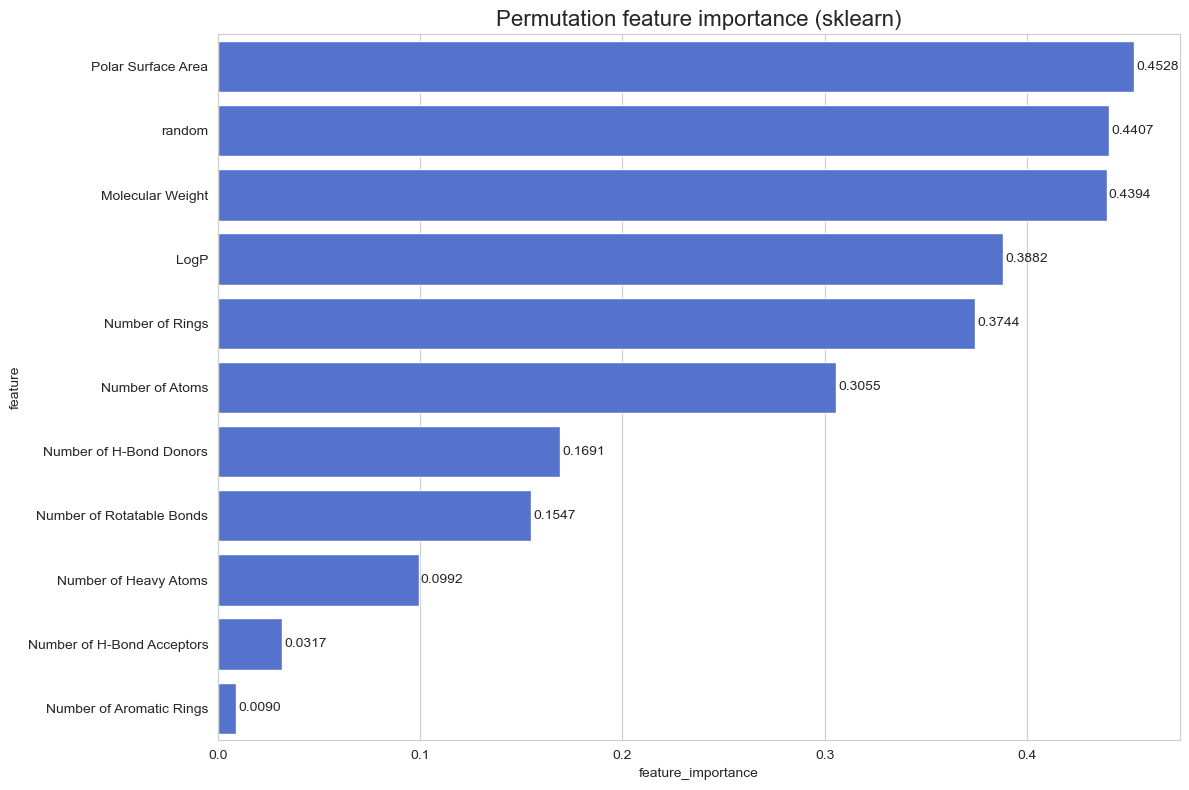


Random feature in permutation importance:
Rank: 2 out of 11 features
Top percentile: 81.82%
Importance value: 0.440695

Calculating drop-column feature importance...
Features ranked by drop-column importance:
                       feature  feature_importance
0                       random            0.175903
1             Molecular Weight            0.003537
2    Number of Rotatable Bonds            0.002135
3           Polar Surface Area            0.001706
4              Number of Rings            0.001435
5                         LogP            0.001089
6      Number of H-Bond Donors            0.000584
7              Number of Atoms           -0.000150
8     Number of Aromatic Rings           -0.000173
9   Number of H-Bond Acceptors           -0.000410
10       Number of Heavy Atoms           -0.000568


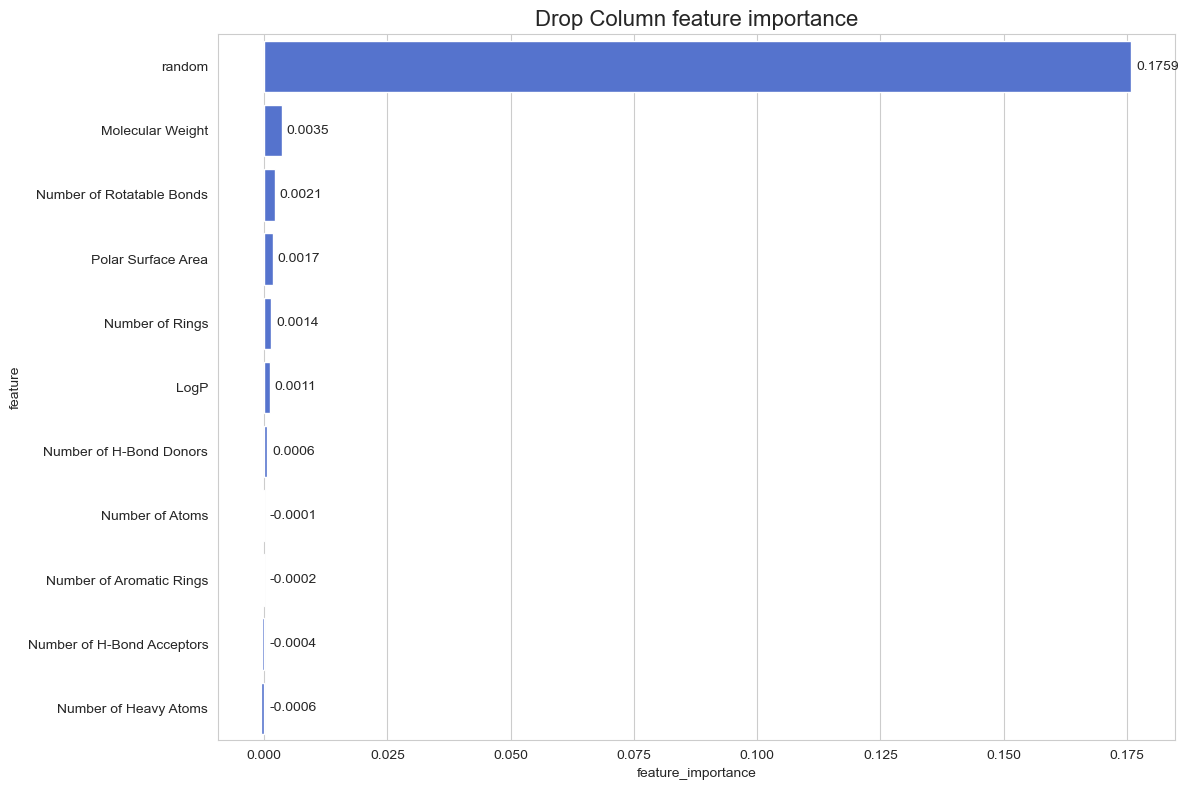


Random feature in drop-column importance:
Rank: 1 out of 11 features
Top percentile: 90.91%
Importance value: 0.175903

Calculating LIME for observation-level feature importance...
Index with smallest error: 1183
Index with largest error: 2084

LIME explanation for the instance with smallest error:
Number of Atoms <= 7.00: 0.3852
0.00 < Number of Rings <= 1.00: 0.1798
Polar Surface Area <= 17.07: -0.1590
Number of H-Bond Donors <= 0.00: -0.1584
95.11 < Molecular Weight <= 98.14: 0.1117
Number of Aromatic Rings <= 0.00: -0.0424
random > 0.75: 0.0246
LogP > 1.05: 0.0147
Number of Rotatable Bonds <= 0.00: -0.0112
Number of H-Bond Acceptors <= 1.00: -0.0062
Number of Heavy Atoms <= 7.00: 0.0000

LIME explanation for the instance with largest error:
Number of Atoms <= 7.00: 0.3702
Number of Rings <= 0.00: -0.1902
Polar Surface Area <= 17.07: -0.1582
Number of H-Bond Donors <= 0.00: -0.1486
Molecular Weight <= 95.11: -0.1437
Number of Aromatic Rings <= 0.00: -0.0439
0.45 < LogP <= 1.05: -0.

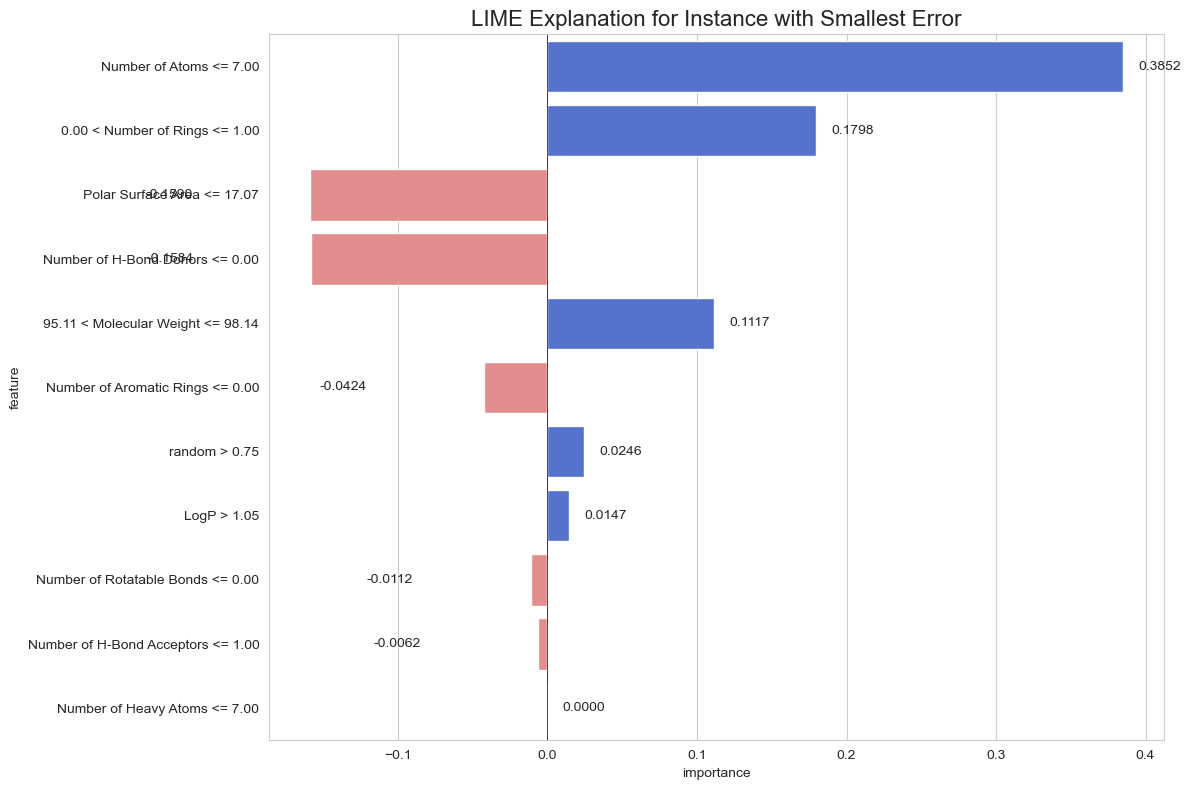

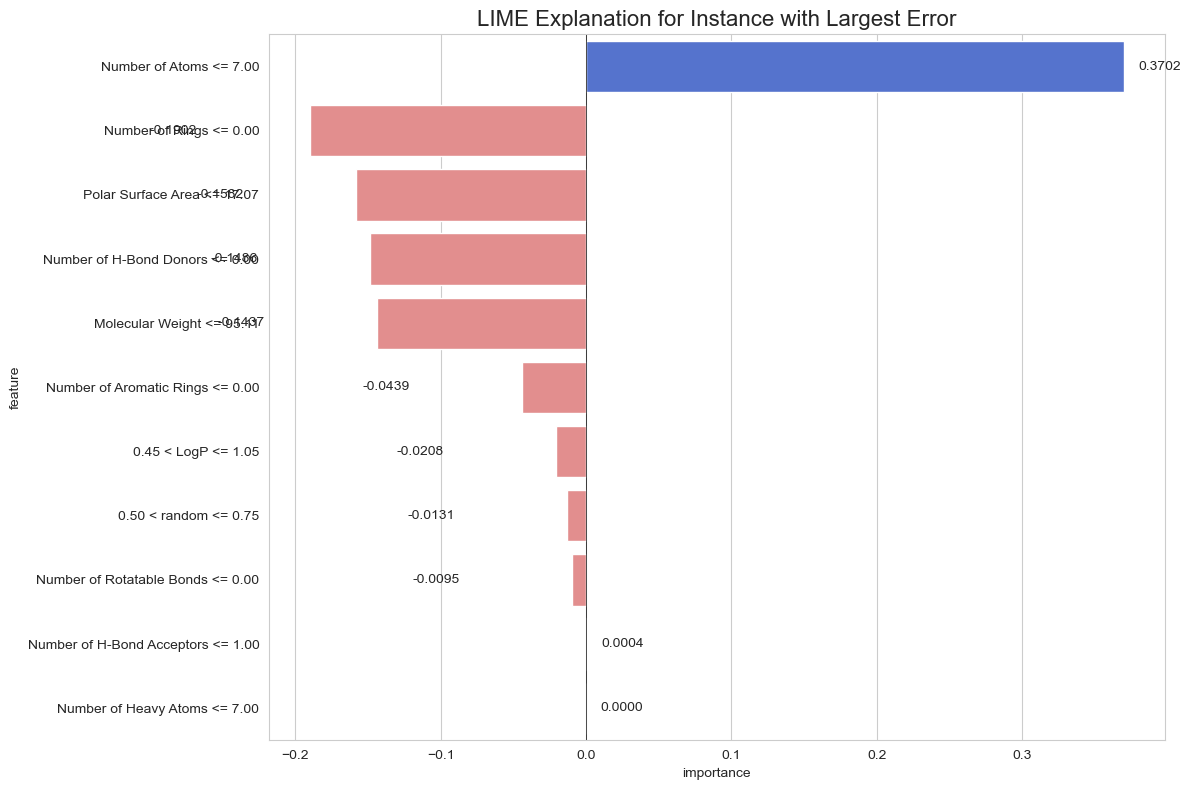


Comparing importance methods:
                       Feature   Default  Permutation  Drop-Column
0                       random  0.278279     0.440695     0.175903
1                         LogP  0.181496     0.388182     0.001089
2             Molecular Weight  0.141205     0.439431     0.003537
3           Polar Surface Area  0.118488     0.452814     0.001706
4              Number of Atoms  0.099272     0.305498    -0.000150
5    Number of Rotatable Bonds  0.054955     0.154746     0.002135
6        Number of Heavy Atoms  0.050985     0.099164    -0.000568
7              Number of Rings  0.036474     0.374356     0.001435
8      Number of H-Bond Donors  0.019591     0.169083     0.000584
9   Number of H-Bond Acceptors  0.014290     0.031739    -0.000410
10    Number of Aromatic Rings  0.004965     0.008954    -0.000173


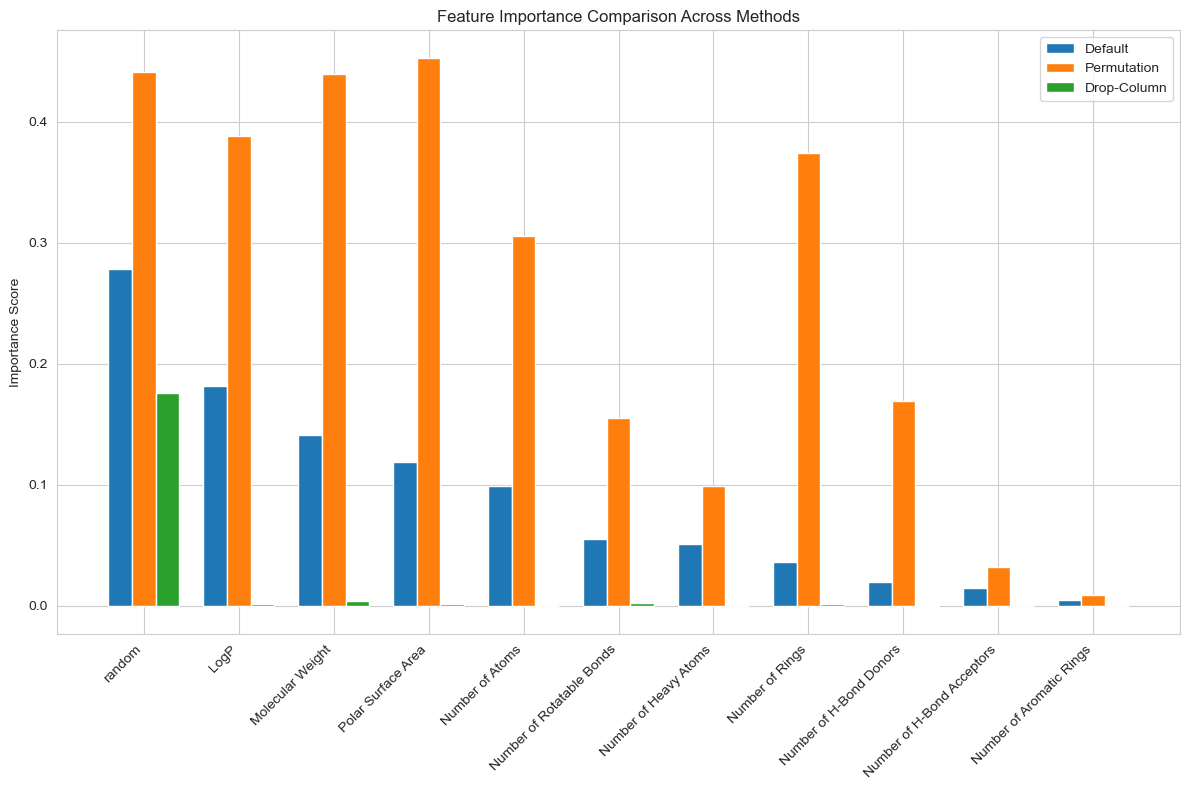


Feature Importance Analysis Complete


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.base import clone
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
import deepchem as dc
from deepchem.molnet import load_qm7
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import lime
import lime.lime_tabular
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

from rdkit import RDLogger
# Suppress RDKit warnings
RDLogger.DisableLog('rdApp.warning')

# Set up visualization parameters
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# Helper function for feature importance dataframe
def imp_df(column_names, importances):
    """Create a dataframe of feature importances"""
    df = pd.DataFrame({
        'feature': column_names,
        'feature_importance': importances
    }).sort_values('feature_importance', ascending=False).reset_index(drop=True)
    return df

# Visualization function
def var_imp_plot(imp_df, title, figsize=(12, 8)):
    """Plot feature importances as a horizontal bar chart"""
    plt.figure(figsize=figsize)
    ax = sns.barplot(x='feature_importance', y='feature', data=imp_df, orient='h', color='royalblue')
    
    # Add value labels to the bars
    for i, v in enumerate(imp_df['feature_importance']):
        ax.text(max(v + 0.001, 0.001), i, f'{v:.4f}', va='center')
    
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Function to analyze random feature position
def analyze_random_feature(imp_df):
    """Analyze where the random feature ranks in importance"""
    random_row = imp_df[imp_df['feature'] == 'random']
    if len(random_row) == 0:
        return "Random feature not found in results"
    
    random_rank = random_row.index[0] + 1
    random_importance = random_row['feature_importance'].values[0]
    total_features = len(imp_df)
    
    return {
        "rank": random_rank,
        "total_features": total_features, 
        "percentile": 100 * (total_features - random_rank) / total_features,
        "importance_value": random_importance
    }

# Function for LIME visualization
def plot_lime_explanation(exp_list, title):
    """Create a horizontal bar chart from LIME explanation list"""
    features = [item[0] for item in exp_list]
    importances = [item[1] for item in exp_list]
    
    df = pd.DataFrame({
        'feature': features,
        'importance': importances
    })
    df = df.sort_values('importance', key=abs, ascending=False)
    
    plt.figure(figsize=(12, 8))
    colors = ['royalblue' if x > 0 else 'lightcoral' for x in df['importance']]
    ax = sns.barplot(x='importance', y='feature', data=df, palette=colors)
    
    for i, v in enumerate(df['importance']):
        ax.text(v + 0.01 if v >= 0 else v - 0.11, i, f'{v:.4f}', va='center')
    
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Drop column feature importance function
def drop_col_feat_imp(model, X_train, y_train, random_state=42):
    """Calculate feature importance by dropping columns one by one"""
    model_clone = clone(model)
    model_clone.random_state = random_state
    
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    importances = []

    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        X_drop = X_train.drop(col, axis=1)
        model_clone.fit(X_drop, y_train)
        drop_col_score = model_clone.score(X_drop, y_train)
        importances.append(benchmark_score - drop_col_score)

    return importances

# Function to calculate molecular descriptors
def calculate_descriptors(smiles_list):
    """Calculate RDKit descriptors for a list of SMILES strings"""
    descriptors = []
    valid_smiles = []
    
    for smiles in smiles_list:
        # Convert string representation to actual SMILES
        if isinstance(smiles, bytes):
            smiles = smiles.decode('utf-8')
        
        # Create RDKit molecule object
        mol = Chem.MolFromSmiles(smiles)
        
        if mol is not None:
            desc_dict = {
                'Molecular Weight': Descriptors.MolWt(mol),
                'LogP': Descriptors.MolLogP(mol),
                'Number of H-Bond Donors': Lipinski.NumHDonors(mol),
                'Number of H-Bond Acceptors': Lipinski.NumHAcceptors(mol),
                'Number of Rotatable Bonds': Descriptors.NumRotatableBonds(mol),
                'Number of Rings': Descriptors.RingCount(mol),
                'Polar Surface Area': Descriptors.TPSA(mol),
                'Number of Aromatic Rings': Lipinski.NumAromaticRings(mol),
                'Number of Atoms': mol.GetNumAtoms(),
                'Number of Heavy Atoms': Descriptors.HeavyAtomCount(mol)
            }
            descriptors.append(desc_dict)
            valid_smiles.append(smiles)
        else:
            print(f"Warning: Could not parse SMILES: {smiles}")
    
    return pd.DataFrame(descriptors), valid_smiles

# Load QM7 dataset
print("Loading QM7 dataset...")
tasks, datasets, transformers = load_qm7()
train_dataset, valid_dataset, test_dataset = datasets

print(f"Task: {tasks[0]}")
print(f"Train set size: {len(train_dataset)}")
print(f"Valid set size: {len(valid_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Extract SMILES from the dataset
try:
    # Try to get SMILES from the DeepChem dataset
    train_smiles = train_dataset.ids
    valid_smiles = valid_dataset.ids
    test_smiles = test_dataset.ids
    
    print(f"Number of SMILES in train set: {len(train_smiles)}")
    print(f"Example SMILES: {train_smiles[0]}")
    
    # Calculate molecular descriptors
    print("\nCalculating molecular descriptors...")
    train_desc_df, valid_train_smiles = calculate_descriptors(train_smiles)
    valid_desc_df, valid_valid_smiles = calculate_descriptors(valid_smiles)
    
    # Match descriptors with target values
    train_targets = []
    for i, smiles in enumerate(valid_train_smiles):
        idx = np.where(np.array(train_smiles) == smiles)[0]
        if len(idx) > 0:
            train_targets.append(train_dataset.y[idx[0]][0])
    
    valid_targets = []
    for i, smiles in enumerate(valid_valid_smiles):
        idx = np.where(np.array(valid_smiles) == smiles)[0]
        if len(idx) > 0:
            valid_targets.append(valid_dataset.y[idx[0]][0])
    
    print(f"Successfully calculated descriptors for {len(train_desc_df)} training compounds")
    print(f"Successfully calculated descriptors for {len(valid_desc_df)} validation compounds")
    
    # Create dataframes
    X_train = train_desc_df.copy()
    y_train = np.array(train_targets)
    X_valid = valid_desc_df.copy()
    y_valid = np.array(valid_targets)

except Exception as e:
    print(f"Error extracting SMILES or calculating descriptors: {e}")
    print("Falling back to direct feature extraction and computation...")
    
    # Alternative approach: Use the Coulomb matrices to generate a dataset with
    # molecular descriptors calculated from 3D structures

    # Get the raw data
    X_train = train_dataset.X
    y_train = train_dataset.y.flatten()
    X_valid = valid_dataset.X
    y_valid = valid_dataset.y.flatten()
    
    print("Using Coulomb matrix features for analysis")
    print(f"Train feature shape: {X_train.shape}")
    
    # For Coulomb matrices, extract derived molecular descriptors
    # We'll compute some interpretable features from the Coulomb matrix
    
    # Function to extract properties from Coulomb matrix
    def extract_coulomb_descriptors(coulomb_matrices):
        # Flatten each Coulomb matrix and compute statistics
        descriptors = []
        
        for cm in coulomb_matrices:
            # Extract diagonal (contains atomic numbers information)
            diagonal = np.diag(cm)
            
            # Extract upper triangular part (contains pairwise interactions)
            upper_tri = cm[np.triu_indices(cm.shape[0], k=1)]
            
            desc = {
                'CM_Mean': np.mean(cm),
                'CM_Std': np.std(cm),
                'CM_Max': np.max(cm),
                'CM_Min': np.min(upper_tri) if len(upper_tri) > 0 else 0,
                'CM_Diagonal_Sum': np.sum(diagonal),
                'CM_Diagonal_Mean': np.mean(diagonal),
                'CM_Diagonal_Std': np.std(diagonal),
                'CM_UpperTri_Mean': np.mean(upper_tri) if len(upper_tri) > 0 else 0,
                'CM_UpperTri_Std': np.std(upper_tri) if len(upper_tri) > 0 else 0,
                'CM_UpperTri_Max': np.max(upper_tri) if len(upper_tri) > 0 else 0,
                'CM_NonZero_Count': np.count_nonzero(cm),
                'CM_Trace': np.trace(cm)
            }
            descriptors.append(desc)
        
        return pd.DataFrame(descriptors)
    
    # Extract descriptors
    print("Extracting descriptors from Coulomb matrices...")
    X_train_df = extract_coulomb_descriptors(X_train)
    X_valid_df = extract_coulomb_descriptors(X_valid)
    
    # Use these as our feature dataframes
    X_train = X_train_df
    X_valid = X_valid_df

# Add a random feature
np.random.seed(42)
X_train['random'] = np.random.random(size=len(X_train))
X_valid['random'] = np.random.random(size=len(X_valid))

print(f"\nFinal train set shape: {X_train.shape}")
print(f"Final validation set shape: {X_valid.shape}")
print(f"Feature columns: {X_train.columns.tolist()}")

# Check correlation between features and target
correlations = {col: np.corrcoef(X_train[col], y_train)[0, 1] for col in X_train.columns}
correlations_df = pd.DataFrame({
    'feature': list(correlations.keys()),
    'correlation': list(correlations.values())
}).sort_values('correlation', key=abs, ascending=False)

print("\nFeature correlations with target (atomization energy):")
print(correlations_df)

# Visualize correlations
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='correlation', y='feature', data=correlations_df, orient='h')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.title("Feature Correlations with Atomization Energy", fontsize=16)
for i, v in enumerate(correlations_df['correlation']):
    ax.text(v + 0.01 if v >= 0 else v - 0.1, i, f'{v:.4f}', va='center')
plt.tight_layout()
plt.show()

# Train Random Forest model
print("\nTraining Random Forest model...")
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1,
    oob_score=True,
    bootstrap=True,
    random_state=42
)
rf.fit(X_train, y_train)

# Evaluate model performance
train_r2 = rf.score(X_train, y_train)
valid_r2 = rf.score(X_valid, y_valid)
oob_score = rf.oob_score_

print(f"R^2 Training Score: {train_r2:.4f}")
print(f"OOB Score: {oob_score:.4f}")
print(f"R^2 Validation Score: {valid_r2:.4f}")

# Default Scikit-learn feature importance
print("\nCalculating default Scikit-learn feature importances...")
base_imp = imp_df(X_train.columns, rf.feature_importances_)
print("Features ranked by default importance:")
print(base_imp)

# Plot features
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

# Analyze random feature in default importance
default_random_analysis = analyze_random_feature(base_imp)
print("\nRandom feature in default importance:")
print(f"Rank: {default_random_analysis['rank']} out of {default_random_analysis['total_features']} features")
print(f"Top percentile: {default_random_analysis['percentile']:.2f}%")
print(f"Importance value: {default_random_analysis['importance_value']:.6f}")

# Permutation feature importance
print("\nCalculating permutation feature importance...")
perm_result = permutation_importance(rf, X_train, y_train, 
                                   n_repeats=10, random_state=42)
perm_imp_sklearn = imp_df(X_train.columns, perm_result.importances_mean)
print("Features ranked by permutation importance:")
print(perm_imp_sklearn)

# Plot features
var_imp_plot(perm_imp_sklearn, 'Permutation feature importance (sklearn)')

# Analyze random feature in permutation importance
perm_random_analysis = analyze_random_feature(perm_imp_sklearn)
print("\nRandom feature in permutation importance:")
print(f"Rank: {perm_random_analysis['rank']} out of {perm_random_analysis['total_features']} features")
print(f"Top percentile: {perm_random_analysis['percentile']:.2f}%")
print(f"Importance value: {perm_random_analysis['importance_value']:.6f}")

# Drop-column feature importance
print("\nCalculating drop-column feature importance...")
drop_imp = drop_col_feat_imp(rf, X_train, y_train)
drop_imp_df = imp_df(X_train.columns, drop_imp)
print("Features ranked by drop-column importance:")
print(drop_imp_df)

# Plot features
var_imp_plot(drop_imp_df, 'Drop Column feature importance')

# Analyze random feature in drop-column importance
drop_random_analysis = analyze_random_feature(drop_imp_df)
print("\nRandom feature in drop-column importance:")
print(f"Rank: {drop_random_analysis['rank']} out of {drop_random_analysis['total_features']} features")
print(f"Top percentile: {drop_random_analysis['percentile']:.2f}%")
print(f"Importance value: {drop_random_analysis['importance_value']:.6f}")

# LIME for observation-level feature importance
print("\nCalculating LIME for observation-level feature importance...")

# Find observations with smallest and largest prediction errors
y_pred_train = rf.predict(X_train)
pred_diff = pd.DataFrame({'difference': abs(y_train - y_pred_train)})
best_idx = pred_diff.sort_values('difference').head(1).index.values[0]
worst_idx = pred_diff.sort_values('difference', ascending=False).head(1).index.values[0]

print(f"Index with smallest error: {best_idx}")
print(f"Index with largest error: {worst_idx}")

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    mode='regression',
    feature_names=X_train.columns,
    discretize_continuous=True
)

# Explain a well-predicted instance
np.random.seed(42)
exp_best = explainer.explain_instance(X_train.iloc[best_idx].values, rf.predict, num_features=len(X_train.columns))
best_explanation = exp_best.as_list()
print("\nLIME explanation for the instance with smallest error:")
for feature, importance in best_explanation:
    print(f"{feature}: {importance:.4f}")

# Explain a poorly-predicted instance
np.random.seed(42)
exp_worst = explainer.explain_instance(X_train.iloc[worst_idx].values, rf.predict, num_features=len(X_train.columns))
worst_explanation = exp_worst.as_list()
print("\nLIME explanation for the instance with largest error:")
for feature, importance in worst_explanation:
    print(f"{feature}: {importance:.4f}")

# Visualize LIME explanations
plot_lime_explanation(best_explanation, 'LIME Explanation for Instance with Smallest Error')
plot_lime_explanation(worst_explanation, 'LIME Explanation for Instance with Largest Error')

# Compare the three importance methods side by side
print("\nComparing importance methods:")
importance_comparison = pd.DataFrame({
    'Feature': base_imp['feature'],
    'Default': base_imp['feature_importance'],
    'Permutation': [perm_imp_sklearn[perm_imp_sklearn['feature'] == feat]['feature_importance'].values[0] 
                   for feat in base_imp['feature']],
    'Drop-Column': [drop_imp_df[drop_imp_df['feature'] == feat]['feature_importance'].values[0] 
                  for feat in base_imp['feature']]
})

print(importance_comparison)

# Create a grouped bar chart for method comparison
features = importance_comparison['Feature']
default = importance_comparison['Default']
permutation = importance_comparison['Permutation']
drop_column = importance_comparison['Drop-Column']

plt.figure(figsize=(12, 8))
x = np.arange(len(features))
width = 0.25

plt.bar(x - width, default, width, label='Default')
plt.bar(x, permutation, width, label='Permutation')
plt.bar(x + width, drop_column, width, label='Drop-Column')

plt.ylabel('Importance Score')
plt.title('Feature Importance Comparison Across Methods')
plt.xticks(x, features, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

print("\nFeature Importance Analysis Complete")